In [2]:
! pip install pulp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 24.3 MB/s eta 0:00:00


In [3]:
#import libraries
%matplotlib inline
import pulp
import pandas as pd
from scipy.spatial import distance_matrix
from matplotlib import pyplot as plt
import time
import copy

In [4]:
def plot_fig(loc,heading="plot"):
    plt.figure(figsize=(10,10))
    for i,row in loc.iterrows():
        if i==0:
            plt.scatter(row["x"],row["y"],c='r')
            plt.text(row["x"]+0.2, row["y"]+0.2, 'START ')
        else:
            plt.scatter(row["x"], row["y"], c='black')
            plt.text(row["x"] + 0.2, row["y"] + 0.2,full_data.loc[i]['i'])
        plt.ylim(-10,120)
        plt.xlim(-10,120)
        plt.title(heading)# this function find all the subtour in the LP solution.

def get_plan(r0):
    r=copy.copy(r0)
    route = []
    while len(r) != 0:
        plan = [r[0]]
        del (r[0])
        l = 0
        while len(plan) > l:
            l = len(plan)
            for i, j in enumerate(r):
                if plan[-1][1] == j[0]:
                    plan.append(j)
                    del (r[i])
        route.append(plan)
    return(route)

In [5]:

df = pd.read_csv("Supermarket Sweep.csv").rename(columns={"Item ": "i", "Price": "p", "X Position": "x", "Y Position": "y"})
# df = df.head(30)
dicti = df.to_dict()
df

,i,p,x,y
0,Start Node,0.00,0,0
1,Coffee Beans,6.99,0,15
2,K-Cups,10.99,0,35
3,Capt. Crunch,3.99,0,65
4,Chewy Bars,3.69,0,90
5,Granola,5.49,0,100
6,Hershey's,2.69,10,85
7,Flour,4.99,10,65
8,Syrup,2.49,10,55
9,Brownie Mix,2.29,10,25


----------data--------------
                     i      p    x    y
0           Start Node   0.00    0    0
1         Coffee Beans   6.99    0   15
2               K-Cups  10.99    0   35
3         Capt. Crunch   3.99    0   65
4           Chewy Bars   3.69    0   90
5              Granola   5.49    0  100
6            Hershey's   2.69   10   85
7                Flour   4.99   10   65
8                Syrup   2.49   10   55
9          Brownie Mix   2.29   10   25
10           Seasoning   3.99   10   10
11                Soup   1.99   20   25
12        Mac & Cheese   2.69   20   45
13             Ketchup   3.49   20   75
14             Pickles   2.99   20   80
15    Italian Dressing   3.99   20   85
16           Soy Sauce   2.49   30   95
17               Penne   3.49   30   90
18            CapriSun   2.49   30   85
19           Tortillas   1.99   30   45
20        Tomato Sauce   2.99   30   15
21           Ibuprofen   5.49   40   20
22             Diapers  25.99   40   35
23         

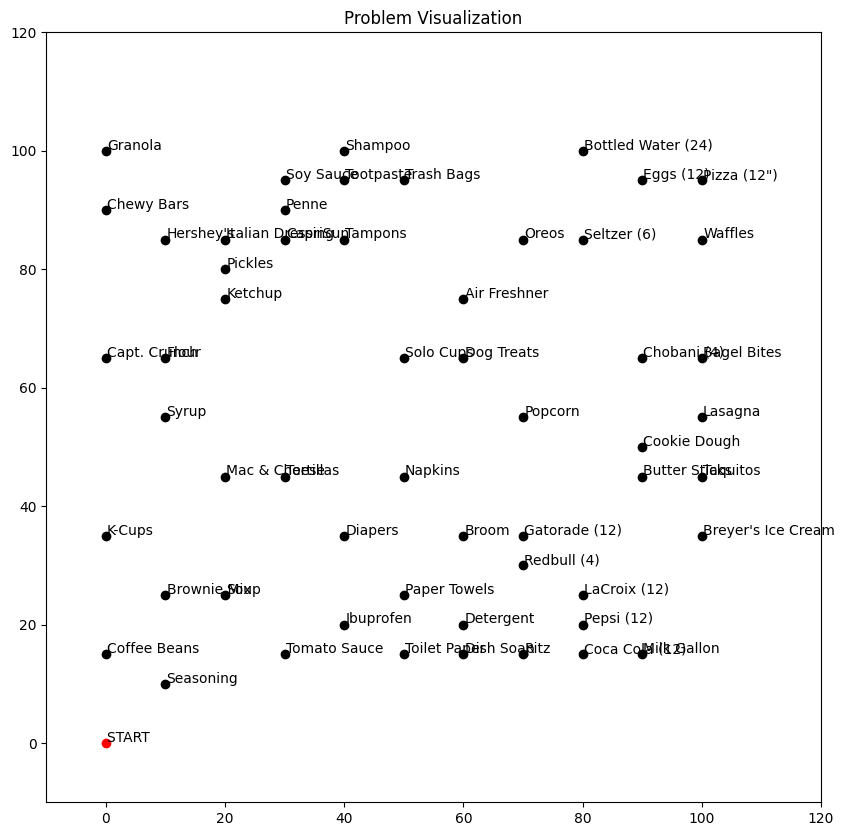

In [6]:
full_data=df.iloc[:,:]
d=full_data[['x','y']]
dis_mat=pd.DataFrame(distance_matrix(d.values,d.values),\
                       index=d.index,columns=d.index)
print("----------data--------------")
print(full_data)
print("-----------------------------")
plot_fig(d,heading="Problem Visualization")

plt.show()

In [7]:
def getDistance(i,j):
    xDist = abs(d["x"][i]-d["x"][j])
    yDist = min(d["y"][i]+d["y"][j], (110-d["y"][i])+(110-d["y"][j]))
    return xDist + yDist

In [8]:
id = list(dicti['i'].keys())
item = dict(zip(id, df['i']))
price = dict(zip(id, df['p']))
item = dict(zip(id, df['i']))
distances = {}
for i in id:
    temp = {}
    for j in id:
      if i == j:
         temp[j] = 1000000
         continue
      temp[j] = getDistance(i,j)
    distances[i] = temp

In [62]:
def find_price(q,s):
  l = s.split(",")
  n = []
  total = 0
  for i in l:
    if i not in n and i != "0":
      print(item[int(i)], "$"+ str(price[int(i)]))
      total += price[int(i)]
      n.append(i)
  total = round(total,2)
  print("Shopper "+str(q+1)+" Total Value: " + str(total))
  return total

# find_price("(0, 40), (40, 39), (39, 38), (38, 36), (36, 30), (30, 5), (5, 4), (4, 3), (3, 2), (2, 1), (1, 0)")
# find_price("(0, 40), (40, 38), (38, 39), (39, 36), (36, 30), (30, 5), (5, 4), (4, 3), (3, 2), (2, 1), (1, 0)")

a = """
[[(0, 21), (21, 22), (22, 32), (32, 52), (52, 54), (54, 56), (56, 42), (42, 41), (41, 1), (1, 2), (2, 0)]]
[[(0, 43), (43, 39), (39, 38), (38, 26), (26, 27), (27, 29), (29, 30), (30, 25), (25, 35), (35, 33), (33, 0)]]
"""
b = a.replace("(", " ").replace(")", " ").replace(" ","").replace("[","").replace("]","").split("\n")
Total = 0
for i,n in enumerate(b[1:3]):
  Total += find_price(i,n)
print("Optimal (Combined)  Value: " + str(Total))

Ibuprofen $5.49
Diapers $25.99
Detergent $12.99
Taquitos $6.99
Lasagna $9.99
Pizza (12") $8.99
LaCroix (12) $5.49
Coca Cola (12) $5.99
Coffee Beans $6.99
K-Cups $10.99
Shopper 1 Total Value: 99.9
Pepsi (12) $5.99
Redbull (4) $7.99
Gatorade (12) $6.99
Toilet Paper $7.99
Paper Towels $9.99
Solo Cups $5.69
Trash Bags $8.99
Shampoo $8.99
Air Freshner $6.99
Broom $13.99
Shopper 2 Total Value: 83.6
Optimal (Combined)  Value: 183.5


## FOR ONE PERSON AT A TIME

In [ ]:
prob=LpProblem("tsp", LpMaximize)

max_time = 60
max_dist = max_time * 10

b1 = LpVariable.dicts("b1", id, cat='Binary')
y1 = LpVariable.dicts("y1", id, lowBound=0, cat='Continuous')
x1 = LpVariable.dicts("x1",((i,j) for i in id for j in id), cat='Binary')
t1 = LpVariable.dicts("t1",((i,j) for i in id for j in id), lowBound=0, cat='Continuous')

# OBJECTIVE FUNCTION

prob += lpSum([(b1[i]*price[i] for i in id)])

# CONSTRAINTS for person 1
for i in id:
    prob += lpSum([(x1[i,j] for j in id)]) == b1[i]
for j in id:
    prob += lpSum([(x1[i,j] for i in id)]) == b1[j]
for i in id:
    for j in id:
            prob += t1[i,j] <= max_dist*x1[i,j]
for i in id:
    prob += x1[i,i] == 0
for j in id:
    if j != 0:
        prob += y1[j] >= lpSum([t1[i,j] if i > 0 else 0 for i in id])
        prob += lpSum([t1[j,k] for k in id]) >=  y1[j] + lpSum([distances[j][k] * x1[j,k] for k in id])- max_dist * (1-b1[j])
prob += y1[0] == 0
prob += lpSum([(b1[i] for i in id)]) * 2 - 2 + 0.1 * lpSum([(distances[i][j]*x1[i,j]for i in id for j in id)]) <= max_time
prob += b1[0] == 1
prob += lpSum([(b1[i] for i in id)]) - 1 <= 10


# prob += b1[1] == 0
# prob += b1[21] == 0
# prob += b1[22] == 0
# prob += b1[26] == 0
# prob += b1[27] == 0
# prob += b1[32] == 0
# prob += b1[33] == 0

path_to_Gurobi = 'D:\\Gurobi\\win64\\bin\\gurobi_cl.exe'
status=prob.solve(GUROBI_CMD(path=path_to_Gurobi))


# path_to_Gurobi = 'D:\\Gurobi\\win64\bin\\gurobi_cl.exe'
# prob.solve(GUROBI_CMD(path=path_to_Gurobi,gapAbs=0))

## FOR BOTH PEOPLE

In [ ]:
prob=LpProblem("tsp", LpMaximize)

max_time = 60
max_dist = max_time * 10

b1 = LpVariable.dicts("b1", id, cat='Binary')
y1 = LpVariable.dicts("y1", id, lowBound=0, cat='Continuous')
x1 = LpVariable.dicts("x1",((i,j) for i in id for j in id), cat='Binary')
t1 = LpVariable.dicts("t1",((i,j) for i in id for j in id), lowBound=0, cat='Continuous')

b2 = LpVariable.dicts("b2", id, cat='Binary')
y2 = LpVariable.dicts("y2", id, lowBound=0, cat='Continuous')
x2 = LpVariable.dicts("x2",((i,j) for i in id for j in id), cat='Binary')
t2 = LpVariable.dicts("t2",((i,j) for i in id for j in id), lowBound=0, cat='Continuous')

# OBJECTIVE FUNCTION
prob += lpSum([((b1[i] + b2[i])*price[i] for i in id)])

# prob += lpSum([(b1[i]*price[i] for i in id)])

# CONSTRAINTS for person 1
for i in id:
    prob += lpSum([(x1[i,j] for j in id)]) == b1[i]
for j in id:
    prob += lpSum([(x1[i,j] for i in id)]) == b1[j]
for i in id:
    for j in id:
            prob += t1[i,j] <= max_dist*x1[i,j]
for i in id:
    prob += x1[i,i] == 0
for j in id:
    if j != 0:
        prob += y1[j] >= lpSum([t1[i,j] if i > 0 else 0 for i in id])
        prob += lpSum([t1[j,k] for k in id]) >=  y1[j] + lpSum([distances[j][k] * x1[j,k] for k in id])- max_dist * (1-b1[j])
prob += y1[0] == 0
prob += lpSum([(b1[i] for i in id)]) * 2 - 2 + 0.1 * lpSum([(distances[i][j]*x1[i,j]for i in id for j in id)]) <= max_time
prob += b1[0] == 1
prob += lpSum([(b1[i] for i in id)]) - 1 <= 10


# CONSTRAINTS for person 2
for i in id:
    prob += lpSum([(x2[i,j] for j in id)]) == b2[i]
for j in id:
    prob += lpSum([(x2[i,j] for i in id)]) == b2[j]
for i in id:
    for j in id:
            prob += t2[i,j] <= max_dist*x2[i,j]
for i in id:
    prob += x2[i,i] == 0
for j in id:
    if j != 0:
        prob += y2[j] >= lpSum([t2[i,j] if i > 0 else 0 for i in id])
        prob += lpSum([t2[j,k] for k in id]) >=  y2[j] + lpSum([distances[j][k] * x2[j,k] for k in id])- max_dist * (1-b2[j])
prob += y2[0] == 0
prob += lpSum([(b2[i] for i in id)]) * 2 - 2 + 0.1 * lpSum([(distances[i][j]*x2[i,j]for i in id for j in id)]) <= max_time
prob += b2[0] == 1
prob += lpSum([(b2[i] for i in id)]) - 1 <= 10


# CONSTRAINTS for both
for i in id:
    if i != 0:
        prob += b1[i] + b2[i] <= 1

path_to_Gurobi = 'D:\\Gurobi\\win64\\bin\\gurobi_cl.exe'
status=prob.solve(GUROBI_CMD(path=path_to_Gurobi))


# path_to_Gurobi = 'D:\\Gurobi\\win64\bin\\gurobi_cl.exe'
# prob.solve(GUROBI_CMD(path=path_to_Gurobi,gapAbs=0))

## PRINT OBJECTIVE VALUE AND ROUTE

In [ ]:
print("-----------------")
print(status,LpStatus[prob.status],value(prob.objective))
route1=[(i,j) for i in id for j in id if pulp.value(x1[i,j])==1]
print(get_plan(route1))

-----------------
1 Optimal 49.43
[[(0, 10), (10, 29), (29, 30), (30, 25), (25, 24), (24, 5), (5, 2), (2, 0)]]


In [ ]:
for s in prob.variables():
    print(s, s.varValue)
    # if s.varValue != 0:
    #     print(s, s.varValue)

b1_0 1.0
b1_1 0.0
b1_10 1.0
b1_11 0.0
b1_12 0.0
b1_13 0.0
b1_14 0.0
b1_15 0.0
b1_16 0.0
b1_17 0.0
b1_18 0.0
b1_19 0.0
b1_2 1.0
b1_20 0.0
b1_21 0.0
b1_22 0.0
b1_23 0.0
b1_24 1.0
b1_25 1.0
b1_26 0.0
b1_27 0.0
b1_28 0.0
b1_29 1.0
b1_3 0.0
b1_30 1.0
b1_31 0.0
b1_32 0.0
b1_33 0.0
b1_34 0.0
b1_35 0.0
b1_36 0.0
b1_37 0.0
b1_38 0.0
b1_39 0.0
b1_4 0.0
b1_40 0.0
b1_41 0.0
b1_42 0.0
b1_43 0.0
b1_44 0.0
b1_45 0.0
b1_46 0.0
b1_47 0.0
b1_48 0.0
b1_49 0.0
b1_5 1.0
b1_50 0.0
b1_51 0.0
b1_52 0.0
b1_53 0.0
b1_54 0.0
b1_55 0.0
b1_56 0.0
b1_6 0.0
b1_7 0.0
b1_8 0.0
b1_9 0.0
t1_(0,_0) 0.0
t1_(0,_1) 0.0
t1_(0,_10) 0.0
t1_(0,_11) 0.0
t1_(0,_12) 0.0
t1_(0,_13) 0.0
t1_(0,_14) 0.0
t1_(0,_15) 0.0
t1_(0,_16) 0.0
t1_(0,_17) 0.0
t1_(0,_18) 0.0
t1_(0,_19) 0.0
t1_(0,_2) 0.0
t1_(0,_20) 0.0
t1_(0,_21) 0.0
t1_(0,_22) 0.0
t1_(0,_23) 0.0
t1_(0,_24) 0.0
t1_(0,_25) 0.0
t1_(0,_26) 0.0
t1_(0,_27) 0.0
t1_(0,_28) 0.0
t1_(0,_29) 0.0
t1_(0,_3) 0.0
t1_(0,_30) 0.0
t1_(0,_31) 0.0
t1_(0,_32) 0.0
t1_(0,_33) 0.0
t1_(0,_34) 0.0
t1_(0,_35

## PLOT GRAPHS

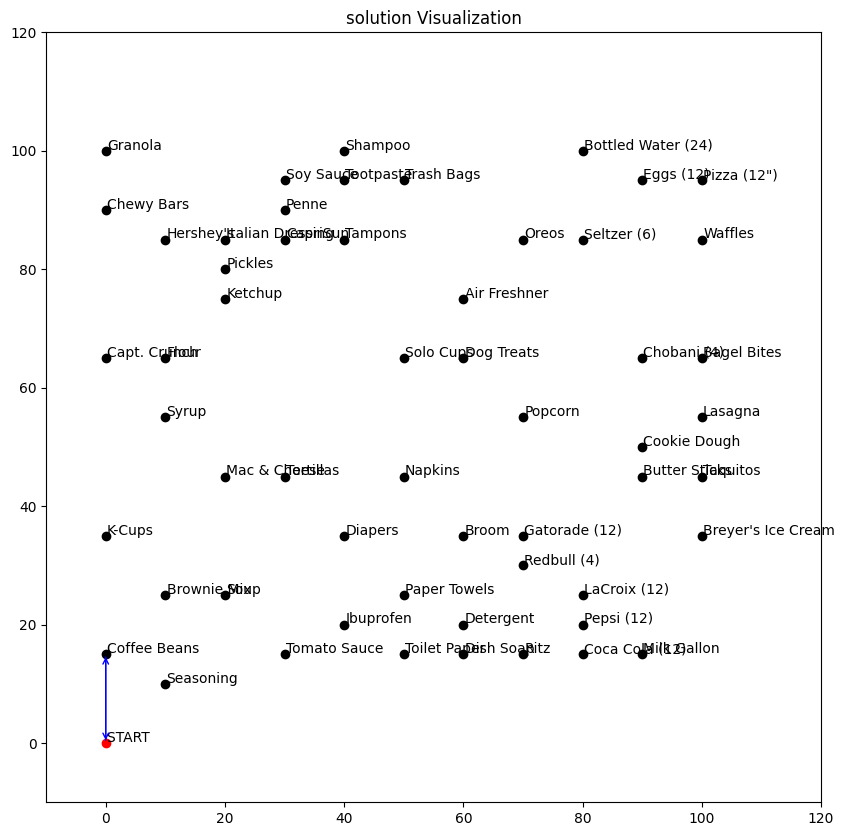

In [ ]:
plot_fig(d,heading="solution Visualization")
arrowprops = dict(arrowstyle='->', connectionstyle='arc3', edgecolor='blue')
for i, j in route1:
    plt.annotate('', xy=[d.iloc[j]['x'], d.iloc[j]['y']],\
                      xytext=[d.iloc[i]['x'], d.iloc[i]['y']],\
                     arrowprops=arrowprops)

In [ ]:
route2=[(i,j) for i in id for j in id if pulp.value(x2[i,j])==1]
print(get_plan(route2))

[[(0, 2), (2, 0)]]


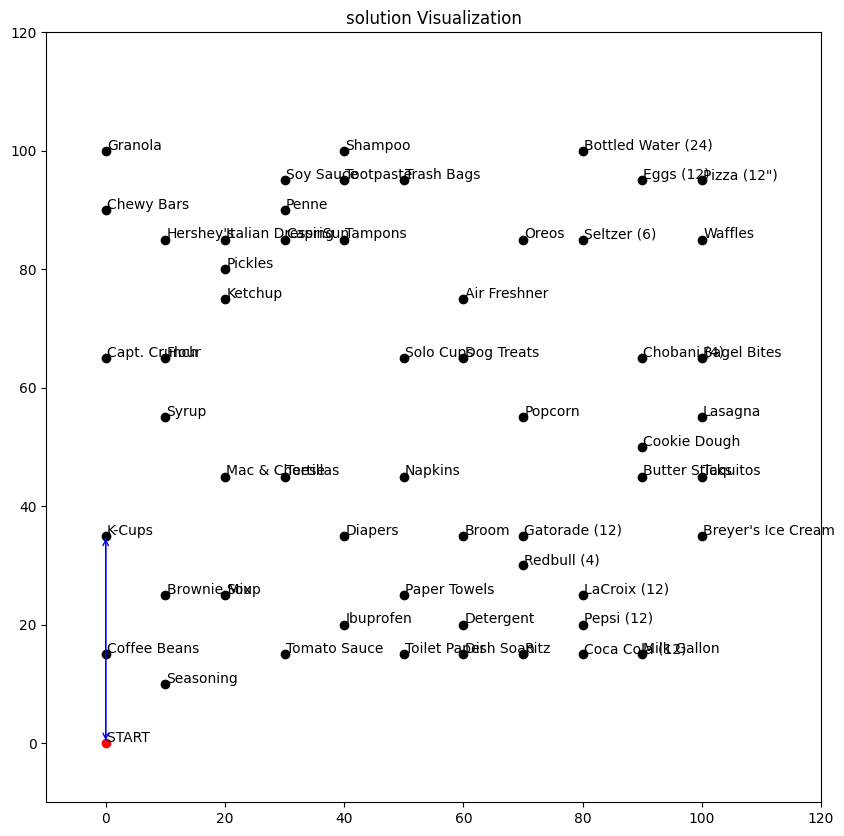

In [ ]:
plot_fig(d,heading="solution Visualization")
arrowprops = dict(arrowstyle='->', connectionstyle='arc3', edgecolor='blue')
for i, j in route2:
    plt.annotate('', xy=[d.iloc[j]['x'], d.iloc[j]['y']],\
                      xytext=[d.iloc[i]['x'], d.iloc[i]['y']],\
                     arrowprops=arrowprops)

## TO GENERATE DATA ON HOW TIME EFFECTS VALUE

In [ ]:
prob=LpProblem("tsp", LpMaximize)

max_time = 10
max_dist = max_time * 10

b1 = LpVariable.dicts("b1", id, cat='Binary')
y1 = LpVariable.dicts("y1", id, lowBound=0, cat='Continuous')
x1 = LpVariable.dicts("x1",((i,j) for i in id for j in id), cat='Binary')
t1 = LpVariable.dicts("t1",((i,j) for i in id for j in id), lowBound=0, cat='Continuous')

b2 = LpVariable.dicts("b2", id, cat='Binary')
y2 = LpVariable.dicts("y2", id, lowBound=0, cat='Continuous')
x2 = LpVariable.dicts("x2",((i,j) for i in id for j in id), cat='Binary')
t2 = LpVariable.dicts("t2",((i,j) for i in id for j in id), lowBound=0, cat='Continuous')

# OBJECTIVE FUNCTION
prob += lpSum([((b1[i] + b2[i])*price[i] for i in id)])

# prob += lpSum([(b1[i]*price[i] for i in id)])

# CONSTRAINTS for person 1
for i in id:
    prob += lpSum([(x1[i,j] for j in id)]) == b1[i]
for j in id:
    prob += lpSum([(x1[i,j] for i in id)]) == b1[j]
for i in id:
    for j in id:
            prob += t1[i,j] <= max_dist*x1[i,j]
for i in id:
    prob += x1[i,i] == 0
for j in id:
    if j != 0:
        prob += y1[j] >= lpSum([t1[i,j] if i > 0 else 0 for i in id])
        prob += lpSum([t1[j,k] for k in id]) >=  y1[j] + lpSum([distances[j][k] * x1[j,k] for k in id])- max_dist * (1-b1[j])
prob += y1[0] == 0
prob += lpSum([(b1[i] for i in id)]) * 2 - 2 + 0.1 * lpSum([(distances[i][j]*x1[i,j]for i in id for j in id)]) <= max_time
prob += b1[0] == 1
prob += lpSum([(b1[i] for i in id)]) - 1 <= 10


# CONSTRAINTS for person 2
for i in id:
    prob += lpSum([(x2[i,j] for j in id)]) == b2[i]
for j in id:
    prob += lpSum([(x2[i,j] for i in id)]) == b2[j]
for i in id:
    for j in id:
            prob += t2[i,j] <= max_dist*x2[i,j]
for i in id:
    prob += x2[i,i] == 0
for j in id:
    if j != 0:
        prob += y2[j] >= lpSum([t2[i,j] if i > 0 else 0 for i in id])
        prob += lpSum([t2[j,k] for k in id]) >=  y2[j] + lpSum([distances[j][k] * x2[j,k] for k in id])- max_dist * (1-b2[j])
prob += y2[0] == 0
prob += lpSum([(b2[i] for i in id)]) * 2 - 2 + 0.1 * lpSum([(distances[i][j]*x2[i,j]for i in id for j in id)]) <= max_time
prob += b2[0] == 1
prob += lpSum([(b2[i] for i in id)]) - 1 <= 10


# CONSTRAINTS for both
for i in id:
    if i != 0:
        prob += b1[i] + b2[i] <= 1

path_to_Gurobi = 'D:\\Gurobi\\win64\\bin\\gurobi_cl.exe'
status=prob.solve(GUROBI_CMD(path=path_to_Gurobi))


print("-----------------")
print(status,LpStatus[prob.status],value(prob.objective))
route1=[(i,j) for i in id for j in id if pulp.value(x1[i,j])==1]
print(get_plan(route1))
print("-----------------")
route2=[(i,j) for i in id for j in id if pulp.value(x2[i,j])==1]
print(get_plan(route2))

-----------------
1 Optimal 17.98
[[(0, 1), (1, 0)]]
-----------------
[[(0, 2), (2, 0)]]


In [ ]:
prob=LpProblem("tsp", LpMaximize)

max_time = 20
max_dist = max_time * 10

b1 = LpVariable.dicts("b1", id, cat='Binary')
y1 = LpVariable.dicts("y1", id, lowBound=0, cat='Continuous')
x1 = LpVariable.dicts("x1",((i,j) for i in id for j in id), cat='Binary')
t1 = LpVariable.dicts("t1",((i,j) for i in id for j in id), lowBound=0, cat='Continuous')

b2 = LpVariable.dicts("b2", id, cat='Binary')
y2 = LpVariable.dicts("y2", id, lowBound=0, cat='Continuous')
x2 = LpVariable.dicts("x2",((i,j) for i in id for j in id), cat='Binary')
t2 = LpVariable.dicts("t2",((i,j) for i in id for j in id), lowBound=0, cat='Continuous')

# OBJECTIVE FUNCTION
prob += lpSum([((b1[i] + b2[i])*price[i] for i in id)])

# prob += lpSum([(b1[i]*price[i] for i in id)])

# CONSTRAINTS for person 1
for i in id:
    prob += lpSum([(x1[i,j] for j in id)]) == b1[i]
for j in id:
    prob += lpSum([(x1[i,j] for i in id)]) == b1[j]
for i in id:
    for j in id:
            prob += t1[i,j] <= max_dist*x1[i,j]
for i in id:
    prob += x1[i,i] == 0
for j in id:
    if j != 0:
        prob += y1[j] >= lpSum([t1[i,j] if i > 0 else 0 for i in id])
        prob += lpSum([t1[j,k] for k in id]) >=  y1[j] + lpSum([distances[j][k] * x1[j,k] for k in id])- max_dist * (1-b1[j])
prob += y1[0] == 0
prob += lpSum([(b1[i] for i in id)]) * 2 - 2 + 0.1 * lpSum([(distances[i][j]*x1[i,j]for i in id for j in id)]) <= max_time
prob += b1[0] == 1
prob += lpSum([(b1[i] for i in id)]) - 1 <= 10


# CONSTRAINTS for person 2
for i in id:
    prob += lpSum([(x2[i,j] for j in id)]) == b2[i]
for j in id:
    prob += lpSum([(x2[i,j] for i in id)]) == b2[j]
for i in id:
    for j in id:
            prob += t2[i,j] <= max_dist*x2[i,j]
for i in id:
    prob += x2[i,i] == 0
for j in id:
    if j != 0:
        prob += y2[j] >= lpSum([t2[i,j] if i > 0 else 0 for i in id])
        prob += lpSum([t2[j,k] for k in id]) >=  y2[j] + lpSum([distances[j][k] * x2[j,k] for k in id])- max_dist * (1-b2[j])
prob += y2[0] == 0
prob += lpSum([(b2[i] for i in id)]) * 2 - 2 + 0.1 * lpSum([(distances[i][j]*x2[i,j]for i in id for j in id)]) <= max_time
prob += b2[0] == 1
prob += lpSum([(b2[i] for i in id)]) - 1 <= 10


# CONSTRAINTS for both
for i in id:
    if i != 0:
        prob += b1[i] + b2[i] <= 1

path_to_Gurobi = 'D:\\Gurobi\\win64\\bin\\gurobi_cl.exe'
status=prob.solve(GUROBI_CMD(path=path_to_Gurobi))


print("-----------------")
print(status,LpStatus[prob.status],value(prob.objective))
route1=[(i,j) for i in id for j in id if pulp.value(x1[i,j])==1]
print(get_plan(route1))
print("-----------------")
route2=[(i,j) for i in id for j in id if pulp.value(x2[i,j])==1]
print(get_plan(route2))

-----------------
1 Optimal 47.959999999999994
[[(0, 22), (22, 0)]]
-----------------
[[(0, 2), (2, 10), (10, 1), (1, 0)]]


In [ ]:
prob=LpProblem("tsp", LpMaximize)

max_time = 30
max_dist = max_time * 10

b1 = LpVariable.dicts("b1", id, cat='Binary')
y1 = LpVariable.dicts("y1", id, lowBound=0, cat='Continuous')
x1 = LpVariable.dicts("x1",((i,j) for i in id for j in id), cat='Binary')
t1 = LpVariable.dicts("t1",((i,j) for i in id for j in id), lowBound=0, cat='Continuous')

b2 = LpVariable.dicts("b2", id, cat='Binary')
y2 = LpVariable.dicts("y2", id, lowBound=0, cat='Continuous')
x2 = LpVariable.dicts("x2",((i,j) for i in id for j in id), cat='Binary')
t2 = LpVariable.dicts("t2",((i,j) for i in id for j in id), lowBound=0, cat='Continuous')

# OBJECTIVE FUNCTION
prob += lpSum([((b1[i] + b2[i])*price[i] for i in id)])

# prob += lpSum([(b1[i]*price[i] for i in id)])

# CONSTRAINTS for person 1
for i in id:
    prob += lpSum([(x1[i,j] for j in id)]) == b1[i]
for j in id:
    prob += lpSum([(x1[i,j] for i in id)]) == b1[j]
for i in id:
    for j in id:
            prob += t1[i,j] <= max_dist*x1[i,j]
for i in id:
    prob += x1[i,i] == 0
for j in id:
    if j != 0:
        prob += y1[j] >= lpSum([t1[i,j] if i > 0 else 0 for i in id])
        prob += lpSum([t1[j,k] for k in id]) >=  y1[j] + lpSum([distances[j][k] * x1[j,k] for k in id])- max_dist * (1-b1[j])
prob += y1[0] == 0
prob += lpSum([(b1[i] for i in id)]) * 2 - 2 + 0.1 * lpSum([(distances[i][j]*x1[i,j]for i in id for j in id)]) <= max_time
prob += b1[0] == 1
prob += lpSum([(b1[i] for i in id)]) - 1 <= 10


# CONSTRAINTS for person 2
for i in id:
    prob += lpSum([(x2[i,j] for j in id)]) == b2[i]
for j in id:
    prob += lpSum([(x2[i,j] for i in id)]) == b2[j]
for i in id:
    for j in id:
            prob += t2[i,j] <= max_dist*x2[i,j]
for i in id:
    prob += x2[i,i] == 0
for j in id:
    if j != 0:
        prob += y2[j] >= lpSum([t2[i,j] if i > 0 else 0 for i in id])
        prob += lpSum([t2[j,k] for k in id]) >=  y2[j] + lpSum([distances[j][k] * x2[j,k] for k in id])- max_dist * (1-b2[j])
prob += y2[0] == 0
prob += lpSum([(b2[i] for i in id)]) * 2 - 2 + 0.1 * lpSum([(distances[i][j]*x2[i,j]for i in id for j in id)]) <= max_time
prob += b2[0] == 1
prob += lpSum([(b2[i] for i in id)]) - 1 <= 10


# CONSTRAINTS for both
for i in id:
    if i != 0:
        prob += b1[i] + b2[i] <= 1

path_to_Gurobi = 'D:\\Gurobi\\win64\\bin\\gurobi_cl.exe'
status=prob.solve(GUROBI_CMD(path=path_to_Gurobi))


print("-----------------")
print(status,LpStatus[prob.status],value(prob.objective))
route1=[(i,j) for i in id for j in id if pulp.value(x1[i,j])==1]
print(get_plan(route1))
print("-----------------")
route2=[(i,j) for i in id for j in id if pulp.value(x2[i,j])==1]
print(get_plan(route2))

-----------------
1 Optimal 71.94
[[(0, 32), (32, 27), (27, 26), (26, 0)]]
-----------------
[[(0, 22), (22, 10), (10, 2), (2, 0)]]


In [ ]:
prob=LpProblem("tsp", LpMaximize)

max_time = 40
max_dist = max_time * 10

b1 = LpVariable.dicts("b1", id, cat='Binary')
y1 = LpVariable.dicts("y1", id, lowBound=0, cat='Continuous')
x1 = LpVariable.dicts("x1",((i,j) for i in id for j in id), cat='Binary')
t1 = LpVariable.dicts("t1",((i,j) for i in id for j in id), lowBound=0, cat='Continuous')

b2 = LpVariable.dicts("b2", id, cat='Binary')
y2 = LpVariable.dicts("y2", id, lowBound=0, cat='Continuous')
x2 = LpVariable.dicts("x2",((i,j) for i in id for j in id), cat='Binary')
t2 = LpVariable.dicts("t2",((i,j) for i in id for j in id), lowBound=0, cat='Continuous')

# OBJECTIVE FUNCTION
prob += lpSum([((b1[i] + b2[i])*price[i] for i in id)])

# prob += lpSum([(b1[i]*price[i] for i in id)])

# CONSTRAINTS for person 1
for i in id:
    prob += lpSum([(x1[i,j] for j in id)]) == b1[i]
for j in id:
    prob += lpSum([(x1[i,j] for i in id)]) == b1[j]
for i in id:
    for j in id:
            prob += t1[i,j] <= max_dist*x1[i,j]
for i in id:
    prob += x1[i,i] == 0
for j in id:
    if j != 0:
        prob += y1[j] >= lpSum([t1[i,j] if i > 0 else 0 for i in id])
        prob += lpSum([t1[j,k] for k in id]) >=  y1[j] + lpSum([distances[j][k] * x1[j,k] for k in id])- max_dist * (1-b1[j])
prob += y1[0] == 0
prob += lpSum([(b1[i] for i in id)]) * 2 - 2 + 0.1 * lpSum([(distances[i][j]*x1[i,j]for i in id for j in id)]) <= max_time
prob += b1[0] == 1
prob += lpSum([(b1[i] for i in id)]) - 1 <= 10


# CONSTRAINTS for person 2
for i in id:
    prob += lpSum([(x2[i,j] for j in id)]) == b2[i]
for j in id:
    prob += lpSum([(x2[i,j] for i in id)]) == b2[j]
for i in id:
    for j in id:
            prob += t2[i,j] <= max_dist*x2[i,j]
for i in id:
    prob += x2[i,i] == 0
for j in id:
    if j != 0:
        prob += y2[j] >= lpSum([t2[i,j] if i > 0 else 0 for i in id])
        prob += lpSum([t2[j,k] for k in id]) >=  y2[j] + lpSum([distances[j][k] * x2[j,k] for k in id])- max_dist * (1-b2[j])
prob += y2[0] == 0
prob += lpSum([(b2[i] for i in id)]) * 2 - 2 + 0.1 * lpSum([(distances[i][j]*x2[i,j]for i in id for j in id)]) <= max_time
prob += b2[0] == 1
prob += lpSum([(b2[i] for i in id)]) - 1 <= 10


# CONSTRAINTS for both
for i in id:
    if i != 0:
        prob += b1[i] + b2[i] <= 1

path_to_Gurobi = 'D:\\Gurobi\\win64\\bin\\gurobi_cl.exe'
status=prob.solve(GUROBI_CMD(path=path_to_Gurobi))


print("-----------------")
print(status,LpStatus[prob.status],value(prob.objective))
route1=[(i,j) for i in id for j in id if pulp.value(x1[i,j])==1]
print(get_plan(route1))
print("-----------------")
route2=[(i,j) for i in id for j in id if pulp.value(x2[i,j])==1]
print(get_plan(route2))

In [ ]:
prob=LpProblem("tsp", LpMaximize)

max_time = 50
max_dist = max_time * 10

b1 = LpVariable.dicts("b1", id, cat='Binary')
y1 = LpVariable.dicts("y1", id, lowBound=0, cat='Continuous')
x1 = LpVariable.dicts("x1",((i,j) for i in id for j in id), cat='Binary')
t1 = LpVariable.dicts("t1",((i,j) for i in id for j in id), lowBound=0, cat='Continuous')

b2 = LpVariable.dicts("b2", id, cat='Binary')
y2 = LpVariable.dicts("y2", id, lowBound=0, cat='Continuous')
x2 = LpVariable.dicts("x2",((i,j) for i in id for j in id), cat='Binary')
t2 = LpVariable.dicts("t2",((i,j) for i in id for j in id), lowBound=0, cat='Continuous')

# OBJECTIVE FUNCTION
prob += lpSum([((b1[i] + b2[i])*price[i] for i in id)])

# prob += lpSum([(b1[i]*price[i] for i in id)])

# CONSTRAINTS for person 1
for i in id:
    prob += lpSum([(x1[i,j] for j in id)]) == b1[i]
for j in id:
    prob += lpSum([(x1[i,j] for i in id)]) == b1[j]
for i in id:
    for j in id:
            prob += t1[i,j] <= max_dist*x1[i,j]
for i in id:
    prob += x1[i,i] == 0
for j in id:
    if j != 0:
        prob += y1[j] >= lpSum([t1[i,j] if i > 0 else 0 for i in id])
        prob += lpSum([t1[j,k] for k in id]) >=  y1[j] + lpSum([distances[j][k] * x1[j,k] for k in id])- max_dist * (1-b1[j])
prob += y1[0] == 0
prob += lpSum([(b1[i] for i in id)]) * 2 - 2 + 0.1 * lpSum([(distances[i][j]*x1[i,j]for i in id for j in id)]) <= max_time
prob += b1[0] == 1
prob += lpSum([(b1[i] for i in id)]) - 1 <= 10


# CONSTRAINTS for person 2
for i in id:
    prob += lpSum([(x2[i,j] for j in id)]) == b2[i]
for j in id:
    prob += lpSum([(x2[i,j] for i in id)]) == b2[j]
for i in id:
    for j in id:
            prob += t2[i,j] <= max_dist*x2[i,j]
for i in id:
    prob += x2[i,i] == 0
for j in id:
    if j != 0:
        prob += y2[j] >= lpSum([t2[i,j] if i > 0 else 0 for i in id])
        prob += lpSum([t2[j,k] for k in id]) >=  y2[j] + lpSum([distances[j][k] * x2[j,k] for k in id])- max_dist * (1-b2[j])
prob += y2[0] == 0
prob += lpSum([(b2[i] for i in id)]) * 2 - 2 + 0.1 * lpSum([(distances[i][j]*x2[i,j]for i in id for j in id)]) <= max_time
prob += b2[0] == 1
prob += lpSum([(b2[i] for i in id)]) - 1 <= 10


# CONSTRAINTS for both
for i in id:
    if i != 0:
        prob += b1[i] + b2[i] <= 1

path_to_Gurobi = 'D:\\Gurobi\\win64\\bin\\gurobi_cl.exe'
status=prob.solve(GUROBI_CMD(path=path_to_Gurobi))


print("-----------------")
print(status,LpStatus[prob.status],value(prob.objective))
route1=[(i,j) for i in id for j in id if pulp.value(x1[i,j])==1]
print(get_plan(route1))
print("-----------------")
route2=[(i,j) for i in id for j in id if pulp.value(x2[i,j])==1]
print(get_plan(route2))

In [ ]:
prob=LpProblem("tsp", LpMaximize)

max_time = 70
max_dist = max_time * 10

b1 = LpVariable.dicts("b1", id, cat='Binary')
y1 = LpVariable.dicts("y1", id, lowBound=0, cat='Continuous')
x1 = LpVariable.dicts("x1",((i,j) for i in id for j in id), cat='Binary')
t1 = LpVariable.dicts("t1",((i,j) for i in id for j in id), lowBound=0, cat='Continuous')

b2 = LpVariable.dicts("b2", id, cat='Binary')
y2 = LpVariable.dicts("y2", id, lowBound=0, cat='Continuous')
x2 = LpVariable.dicts("x2",((i,j) for i in id for j in id), cat='Binary')
t2 = LpVariable.dicts("t2",((i,j) for i in id for j in id), lowBound=0, cat='Continuous')

# OBJECTIVE FUNCTION
prob += lpSum([((b1[i] + b2[i])*price[i] for i in id)])

# prob += lpSum([(b1[i]*price[i] for i in id)])

# CONSTRAINTS for person 1
for i in id:
    prob += lpSum([(x1[i,j] for j in id)]) == b1[i]
for j in id:
    prob += lpSum([(x1[i,j] for i in id)]) == b1[j]
for i in id:
    for j in id:
            prob += t1[i,j] <= max_dist*x1[i,j]
for i in id:
    prob += x1[i,i] == 0
for j in id:
    if j != 0:
        prob += y1[j] >= lpSum([t1[i,j] if i > 0 else 0 for i in id])
        prob += lpSum([t1[j,k] for k in id]) >=  y1[j] + lpSum([distances[j][k] * x1[j,k] for k in id])- max_dist * (1-b1[j])
prob += y1[0] == 0
prob += lpSum([(b1[i] for i in id)]) * 2 - 2 + 0.1 * lpSum([(distances[i][j]*x1[i,j]for i in id for j in id)]) <= max_time
prob += b1[0] == 1
prob += lpSum([(b1[i] for i in id)]) - 1 <= 10


# CONSTRAINTS for person 2
for i in id:
    prob += lpSum([(x2[i,j] for j in id)]) == b2[i]
for j in id:
    prob += lpSum([(x2[i,j] for i in id)]) == b2[j]
for i in id:
    for j in id:
            prob += t2[i,j] <= max_dist*x2[i,j]
for i in id:
    prob += x2[i,i] == 0
for j in id:
    if j != 0:
        prob += y2[j] >= lpSum([t2[i,j] if i > 0 else 0 for i in id])
        prob += lpSum([t2[j,k] for k in id]) >=  y2[j] + lpSum([distances[j][k] * x2[j,k] for k in id])- max_dist * (1-b2[j])
prob += y2[0] == 0
prob += lpSum([(b2[i] for i in id)]) * 2 - 2 + 0.1 * lpSum([(distances[i][j]*x2[i,j]for i in id for j in id)]) <= max_time
prob += b2[0] == 1
prob += lpSum([(b2[i] for i in id)]) - 1 <= 10


# CONSTRAINTS for both
for i in id:
    if i != 0:
        prob += b1[i] + b2[i] <= 1

path_to_Gurobi = 'D:\\Gurobi\\win64\\bin\\gurobi_cl.exe'
status=prob.solve(GUROBI_CMD(path=path_to_Gurobi))


print("-----------------")
print(status,LpStatus[prob.status],value(prob.objective))
route1=[(i,j) for i in id for j in id if pulp.value(x1[i,j])==1]
print(get_plan(route1))
print("-----------------")
route2=[(i,j) for i in id for j in id if pulp.value(x2[i,j])==1]
print(get_plan(route2))

In [ ]:
prob=LpProblem("tsp", LpMaximize)

max_time = 80
max_dist = max_time * 10

b1 = LpVariable.dicts("b1", id, cat='Binary')
y1 = LpVariable.dicts("y1", id, lowBound=0, cat='Continuous')
x1 = LpVariable.dicts("x1",((i,j) for i in id for j in id), cat='Binary')
t1 = LpVariable.dicts("t1",((i,j) for i in id for j in id), lowBound=0, cat='Continuous')

b2 = LpVariable.dicts("b2", id, cat='Binary')
y2 = LpVariable.dicts("y2", id, lowBound=0, cat='Continuous')
x2 = LpVariable.dicts("x2",((i,j) for i in id for j in id), cat='Binary')
t2 = LpVariable.dicts("t2",((i,j) for i in id for j in id), lowBound=0, cat='Continuous')

# OBJECTIVE FUNCTION
prob += lpSum([((b1[i] + b2[i])*price[i] for i in id)])

# prob += lpSum([(b1[i]*price[i] for i in id)])

# CONSTRAINTS for person 1
for i in id:
    prob += lpSum([(x1[i,j] for j in id)]) == b1[i]
for j in id:
    prob += lpSum([(x1[i,j] for i in id)]) == b1[j]
for i in id:
    for j in id:
            prob += t1[i,j] <= max_dist*x1[i,j]
for i in id:
    prob += x1[i,i] == 0
for j in id:
    if j != 0:
        prob += y1[j] >= lpSum([t1[i,j] if i > 0 else 0 for i in id])
        prob += lpSum([t1[j,k] for k in id]) >=  y1[j] + lpSum([distances[j][k] * x1[j,k] for k in id])- max_dist * (1-b1[j])
prob += y1[0] == 0
prob += lpSum([(b1[i] for i in id)]) * 2 - 2 + 0.1 * lpSum([(distances[i][j]*x1[i,j]for i in id for j in id)]) <= max_time
prob += b1[0] == 1
prob += lpSum([(b1[i] for i in id)]) - 1 <= 10


# CONSTRAINTS for person 2
for i in id:
    prob += lpSum([(x2[i,j] for j in id)]) == b2[i]
for j in id:
    prob += lpSum([(x2[i,j] for i in id)]) == b2[j]
for i in id:
    for j in id:
            prob += t2[i,j] <= max_dist*x2[i,j]
for i in id:
    prob += x2[i,i] == 0
for j in id:
    if j != 0:
        prob += y2[j] >= lpSum([t2[i,j] if i > 0 else 0 for i in id])
        prob += lpSum([t2[j,k] for k in id]) >=  y2[j] + lpSum([distances[j][k] * x2[j,k] for k in id])- max_dist * (1-b2[j])
prob += y2[0] == 0
prob += lpSum([(b2[i] for i in id)]) * 2 - 2 + 0.1 * lpSum([(distances[i][j]*x2[i,j]for i in id for j in id)]) <= max_time
prob += b2[0] == 1
prob += lpSum([(b2[i] for i in id)]) - 1 <= 10


# CONSTRAINTS for both
for i in id:
    if i != 0:
        prob += b1[i] + b2[i] <= 1

path_to_Gurobi = 'D:\\Gurobi\\win64\\bin\\gurobi_cl.exe'
status=prob.solve(GUROBI_CMD(path=path_to_Gurobi))


print("-----------------")
print(status,LpStatus[prob.status],value(prob.objective))
route1=[(i,j) for i in id for j in id if pulp.value(x1[i,j])==1]
print(get_plan(route1))
print("-----------------")
route2=[(i,j) for i in id for j in id if pulp.value(x2[i,j])==1]
print(get_plan(route2))

In [ ]:
prob=LpProblem("tsp", LpMaximize)

max_time = 90
max_dist = max_time * 10

b1 = LpVariable.dicts("b1", id, cat='Binary')
y1 = LpVariable.dicts("y1", id, lowBound=0, cat='Continuous')
x1 = LpVariable.dicts("x1",((i,j) for i in id for j in id), cat='Binary')
t1 = LpVariable.dicts("t1",((i,j) for i in id for j in id), lowBound=0, cat='Continuous')

b2 = LpVariable.dicts("b2", id, cat='Binary')
y2 = LpVariable.dicts("y2", id, lowBound=0, cat='Continuous')
x2 = LpVariable.dicts("x2",((i,j) for i in id for j in id), cat='Binary')
t2 = LpVariable.dicts("t2",((i,j) for i in id for j in id), lowBound=0, cat='Continuous')

# OBJECTIVE FUNCTION
prob += lpSum([((b1[i] + b2[i])*price[i] for i in id)])

# prob += lpSum([(b1[i]*price[i] for i in id)])

# CONSTRAINTS for person 1
for i in id:
    prob += lpSum([(x1[i,j] for j in id)]) == b1[i]
for j in id:
    prob += lpSum([(x1[i,j] for i in id)]) == b1[j]
for i in id:
    for j in id:
            prob += t1[i,j] <= max_dist*x1[i,j]
for i in id:
    prob += x1[i,i] == 0
for j in id:
    if j != 0:
        prob += y1[j] >= lpSum([t1[i,j] if i > 0 else 0 for i in id])
        prob += lpSum([t1[j,k] for k in id]) >=  y1[j] + lpSum([distances[j][k] * x1[j,k] for k in id])- max_dist * (1-b1[j])
prob += y1[0] == 0
prob += lpSum([(b1[i] for i in id)]) * 2 - 2 + 0.1 * lpSum([(distances[i][j]*x1[i,j]for i in id for j in id)]) <= max_time
prob += b1[0] == 1
prob += lpSum([(b1[i] for i in id)]) - 1 <= 10


# CONSTRAINTS for person 2
for i in id:
    prob += lpSum([(x2[i,j] for j in id)]) == b2[i]
for j in id:
    prob += lpSum([(x2[i,j] for i in id)]) == b2[j]
for i in id:
    for j in id:
            prob += t2[i,j] <= max_dist*x2[i,j]
for i in id:
    prob += x2[i,i] == 0
for j in id:
    if j != 0:
        prob += y2[j] >= lpSum([t2[i,j] if i > 0 else 0 for i in id])
        prob += lpSum([t2[j,k] for k in id]) >=  y2[j] + lpSum([distances[j][k] * x2[j,k] for k in id])- max_dist * (1-b2[j])
prob += y2[0] == 0
prob += lpSum([(b2[i] for i in id)]) * 2 - 2 + 0.1 * lpSum([(distances[i][j]*x2[i,j]for i in id for j in id)]) <= max_time
prob += b2[0] == 1
prob += lpSum([(b2[i] for i in id)]) - 1 <= 10


# CONSTRAINTS for both
for i in id:
    if i != 0:
        prob += b1[i] + b2[i] <= 1

path_to_Gurobi = 'D:\\Gurobi\\win64\\bin\\gurobi_cl.exe'
status=prob.solve(GUROBI_CMD(path=path_to_Gurobi))


print("-----------------")
print(status,LpStatus[prob.status],value(prob.objective))
route1=[(i,j) for i in id for j in id if pulp.value(x1[i,j])==1]
print(get_plan(route1))
print("-----------------")
route2=[(i,j) for i in id for j in id if pulp.value(x2[i,j])==1]
print(get_plan(route2))

In [30]:
def gettime(i,j):
    xDist = abs(d["x"][i]-d["x"][j])

    if xDist==0:
        yDist=abs(d["y"][i]-d["y"][j])
    else:
        up_dist=(110-d["y"][i])+(110-d["y"][j])
        down_dist=(d["y"][i]-0)+(d["y"][j]-0)
        yDist=min(up_dist,down_dist)

    return (xDist + yDist)/10


id = list(dicti['i'].keys())
item = dict(zip(id, df['i']))
price = dict(zip(id, df['p']))
item = dict(zip(id, df['i']))
times = {}
for i in id:
    for j in id:
        times[(i, j)] = gettime(i, j)

In [31]:
times

{(0, 0): 0.0,
 (0, 1): 1.5,
 (0, 2): 3.5,
 (0, 3): 6.5,
 (0, 4): 9.0,
 (0, 5): 10.0,
 (0, 6): 9.5,
 (0, 7): 7.5,
 (0, 8): 6.5,
 (0, 9): 3.5,
 (0, 10): 2.0,
 (0, 11): 4.5,
 (0, 12): 6.5,
 (0, 13): 9.5,
 (0, 14): 10.0,
 (0, 15): 10.5,
 (0, 16): 12.5,
 (0, 17): 12.0,
 (0, 18): 11.5,
 (0, 19): 7.5,
 (0, 20): 4.5,
 (0, 21): 6.0,
 (0, 22): 7.5,
 (0, 23): 13.5,
 (0, 24): 12.5,
 (0, 25): 14.0,
 (0, 26): 6.5,
 (0, 27): 7.5,
 (0, 28): 9.5,
 (0, 29): 11.5,
 (0, 30): 14.5,
 (0, 31): 7.5,
 (0, 32): 8.0,
 (0, 33): 9.5,
 (0, 34): 12.5,
 (0, 35): 13.5,
 (0, 36): 15.5,
 (0, 37): 12.5,
 (0, 38): 10.5,
 (0, 39): 10.0,
 (0, 40): 8.5,
 (0, 41): 9.5,
 (0, 42): 10.5,
 (0, 43): 10.0,
 (0, 44): 16.5,
 (0, 45): 18.0,
 (0, 46): 10.5,
 (0, 47): 13.5,
 (0, 48): 14.0,
 (0, 49): 15.5,
 (0, 50): 18.5,
 (0, 51): 18.5,
 (0, 52): 14.5,
 (0, 53): 13.5,
 (0, 54): 15.5,
 (0, 55): 16.5,
 (0, 56): 19.5,
 (1, 0): 1.5,
 (1, 1): 0.0,
 (1, 2): 2.0,
 (1, 3): 5.0,
 (1, 4): 7.5,
 (1, 5): 8.5,
 (1, 6): 11.0,
 (1, 7): 9.0,
 (1, 8): 8